   # PROJECT 2 

## TASK 1 & 2:  Compute Permutation Entropy and Complexity

In [1]:
#step 1: load data
#step 2: specify time series embedded dimension, embedded delay and signal length 
#step 3: compute permutation entropy and complexity
#step 4: select subject, take 1 axis, take 1 signal length, take 1 dimension

###### We will use the definitions from Week 8: Hands on Lab Session for this project

In [2]:
''' This module has essential functions supporting
fast and effective computation of permutation entropy and
its different variations.'''
import numpy as np


def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts)

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*(m-1)):, :]
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * math.factorial(n-1) + _hash(x[:, 1:])


def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts)

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*(m-1)):, :]
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0])
''' This module has essential functions supporting
fast and effective computation of permutation entropy and
its different variations.'''
import numpy as np


def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts)

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*(m-1)):, :]
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * math.factorial(n-1) + _hash(x[:, 1:])


def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts)

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*(m-1)):, :]
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0])

In [1]:
import pandas as np

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import entropy

In [4]:
#get file path directory to import files 
import os
print(os.getcwd())

/Users/ateraalam/IE 6400 Project 2


In [5]:
#Load the dataset and extract activity and subject no. from filename 
def load_data(activity, subject, base_path='/Users/ateraalam/IE 6400 Project 2/Data'):
    file_name = f'{subject}_{activity}_chest.csv' #use f-string to extract subject and activity from file name 
    ##file name example: s01_climbingdown_chest.csv##
    file_path = os.path.join(base_path, file_name) #combine basepath and filename to a full file path
    return pd.read_csv(file_path) 

In [6]:
# Define the parameters
subjects = range(1, 16) #total number of subjects is 15 
activities = ['walking', 'running', 'climbingup', 'climbingdown']
dimensions = [3, 4, 5, 6] #as provided in the project instruction 
delays = [1, 2, 3] #as provided in the project instruction 
signal_lengths = [1024, 2048, 4096] #as provided in the project instruction 

#make an empty list to store data
results = []

# Iterate through all data in the parameters 
for subject in subjects:
    for activity in activities:
        for m in dimensions:
            for tau in delays:
                for signal_length in signal_lengths:
                    for axis in ['attr_x', 'attr_y', 'attr_z']:
                        #use .zfill method so that it matches subject naming convention in file 
                        data = load_data(activity, f's{str(subject).zfill(2)}') 
                        #slicing timeseries with the given signal length paramaters 
                        time_series = data[axis][:signal_length] 
                        #Use time series to calculate ordinal patterns 
                        op_timeseries = ordinal_patterns(time_series, m, tau) #formula from lab 8 
                        #Use ordinal pattern to calculation PE 
                        pe_timeseries = p_entropy(op_timeseries) #formula from lab 8 
                        complexity_timeseries = complexity(op_timeseries)
                        #organize results as shown in sample output table 
                        results.append({
                            'Subject': subject,
                            'Accelerometer Axis': axis,
                            'Signal Length': signal_length,
                            'Dimension': m,
                            'Delay': tau,
                            'Permutation Entropy': pe_timeseries,
                            'Complexity': complexity_timeseries,
                            'Activity': activity
                        }) 
# Convert results to DataFrame
results_df = pd.DataFrame(results)

#display first few rows 
results_df.head()

,Subject,Accelerometer Axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Activity
0,1,attr_x,1024,3,1,0.855987,0.119191,walking
1,1,attr_y,1024,3,1,0.816343,0.145361,walking
2,1,attr_z,1024,3,1,0.913619,0.075973,walking
3,1,attr_x,2048,3,1,0.844650,0.127396,walking
4,1,attr_y,2048,3,1,0.798877,0.155274,walking


In [7]:
results_df

,Subject,Accelerometer Axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Activity
0,1,attr_x,1024,3,1,0.855987,0.119191,walking
1,1,attr_y,1024,3,1,0.816343,0.145361,walking
2,1,attr_z,1024,3,1,0.913619,0.075973,walking
3,1,attr_x,2048,3,1,0.844650,0.127396,walking
4,1,attr_y,2048,3,1,0.798877,0.155274,walking
...,...,...,...,...,...,...,...,...
6475,15,attr_y,2048,6,3,0.954090,0.096949,climbingdown
6476,15,attr_z,2048,6,3,0.964066,0.079196,climbingdown
6477,15,attr_x,4096,6,3,0.936151,0.135031,climbingdown
6478,15,attr_y,4096,6,3,0.947625,0.113789,climbingdown


##### Task 1 and 2 are completed. 

# TASK 3

In [8]:
#filter the rows to only contain desired values 
filtered_df1 = results_df[(results_df['Subject'] == 1) & #chosen subject is s01
                         (results_df['Accelerometer Axis'] == 'attr_x') & #chosen axis is x
                         (results_df['Signal Length'] == 1024) & 
                         (results_df['Activity'].isin(['walking', 'running']))]

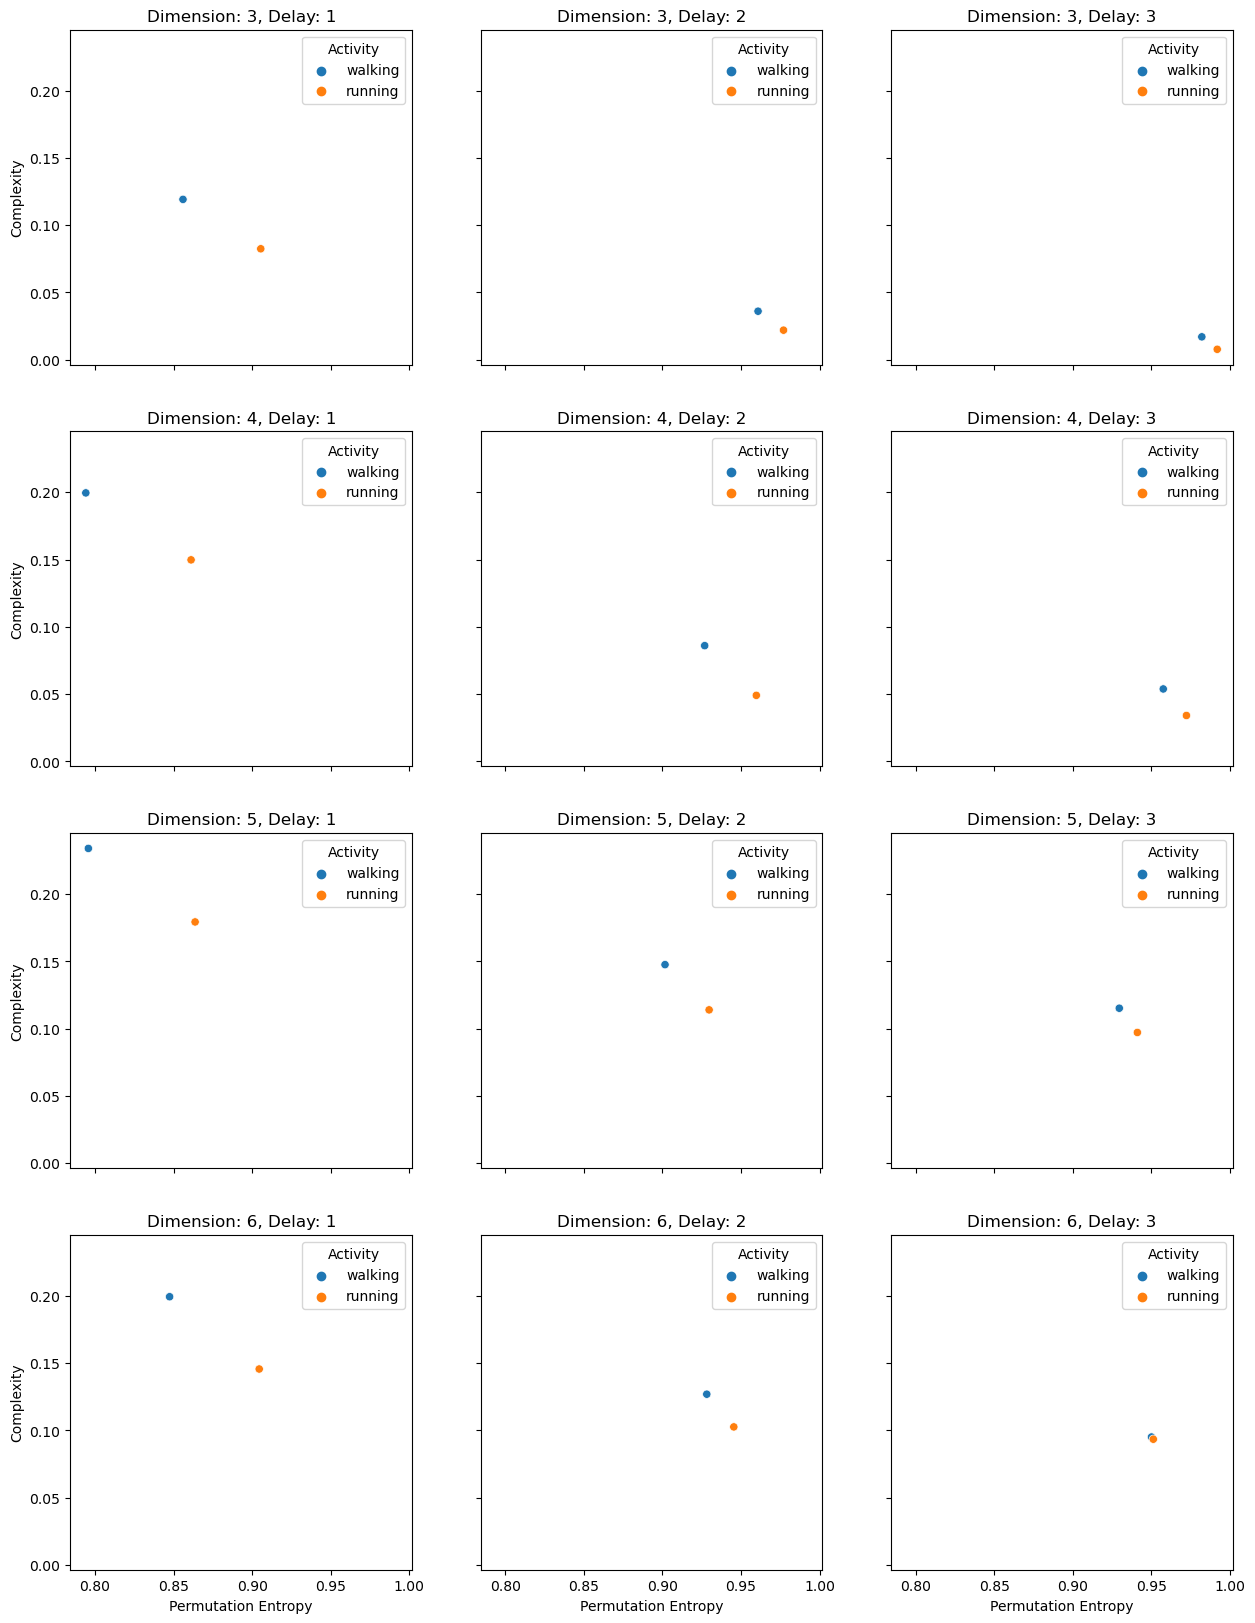

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

dimensions = [3, 4, 5, 6]
delays = [1, 2, 3]

# Calculate the total number of plots
total_plots = len(dimensions) * len(delays) 

'''
Determine the number of rows/columns for the subplot grid
Here, we're creating a grid that has a number of rows equal to the number of dimensions
and a number of columns equal to the number of delays
'''

num_rows = len(dimensions)
num_cols = len(delays)

# Create a figure and axes for the subplots, find the best fig size to fit the subpplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows), sharex=True, sharey=True)

#iterate through the dimension and delay values using enumerate function 
for i, dimension in enumerate(dimensions): # i is row 
    for j, delay in enumerate(delays): #j is column 
        ax = axs[i, j]
        
        # Filtered data for specific dimension and delay
        plot_data = filtered_df1[(filtered_df1['Dimension'] == dimension) & (filtered_df1['Delay'] == delay)]
        
        # Generate scatter plot for specific dimension and delay
        sns.scatterplot(ax=ax, data=plot_data, x='Permutation Entropy', y='Complexity', hue='Activity')
        
        # Set title for each subplot to indicate the dimension and delay
        ax.set_title(f'Dimension: {dimension}, Delay: {delay}') #use f-string to show the D and tau value 


# Display the plot
plt.show()


### Task 3 Conclusion: In this task, signal length of 1024 was used. The optimum dimension is 5 and delay 1 for this task. This combination yields the best separation between the two activities, walking and running 

# TASK 4

In [10]:
#filter the rows to only contain desired values 
filtered_df2 = results_df[(results_df['Subject'] == 1) & 
                         (results_df['Accelerometer Axis'] == 'attr_x') & 
                         (results_df['Signal Length'] == 1024) & 
                         (results_df['Activity'].isin(['climbingup', 'climbingdown']))]

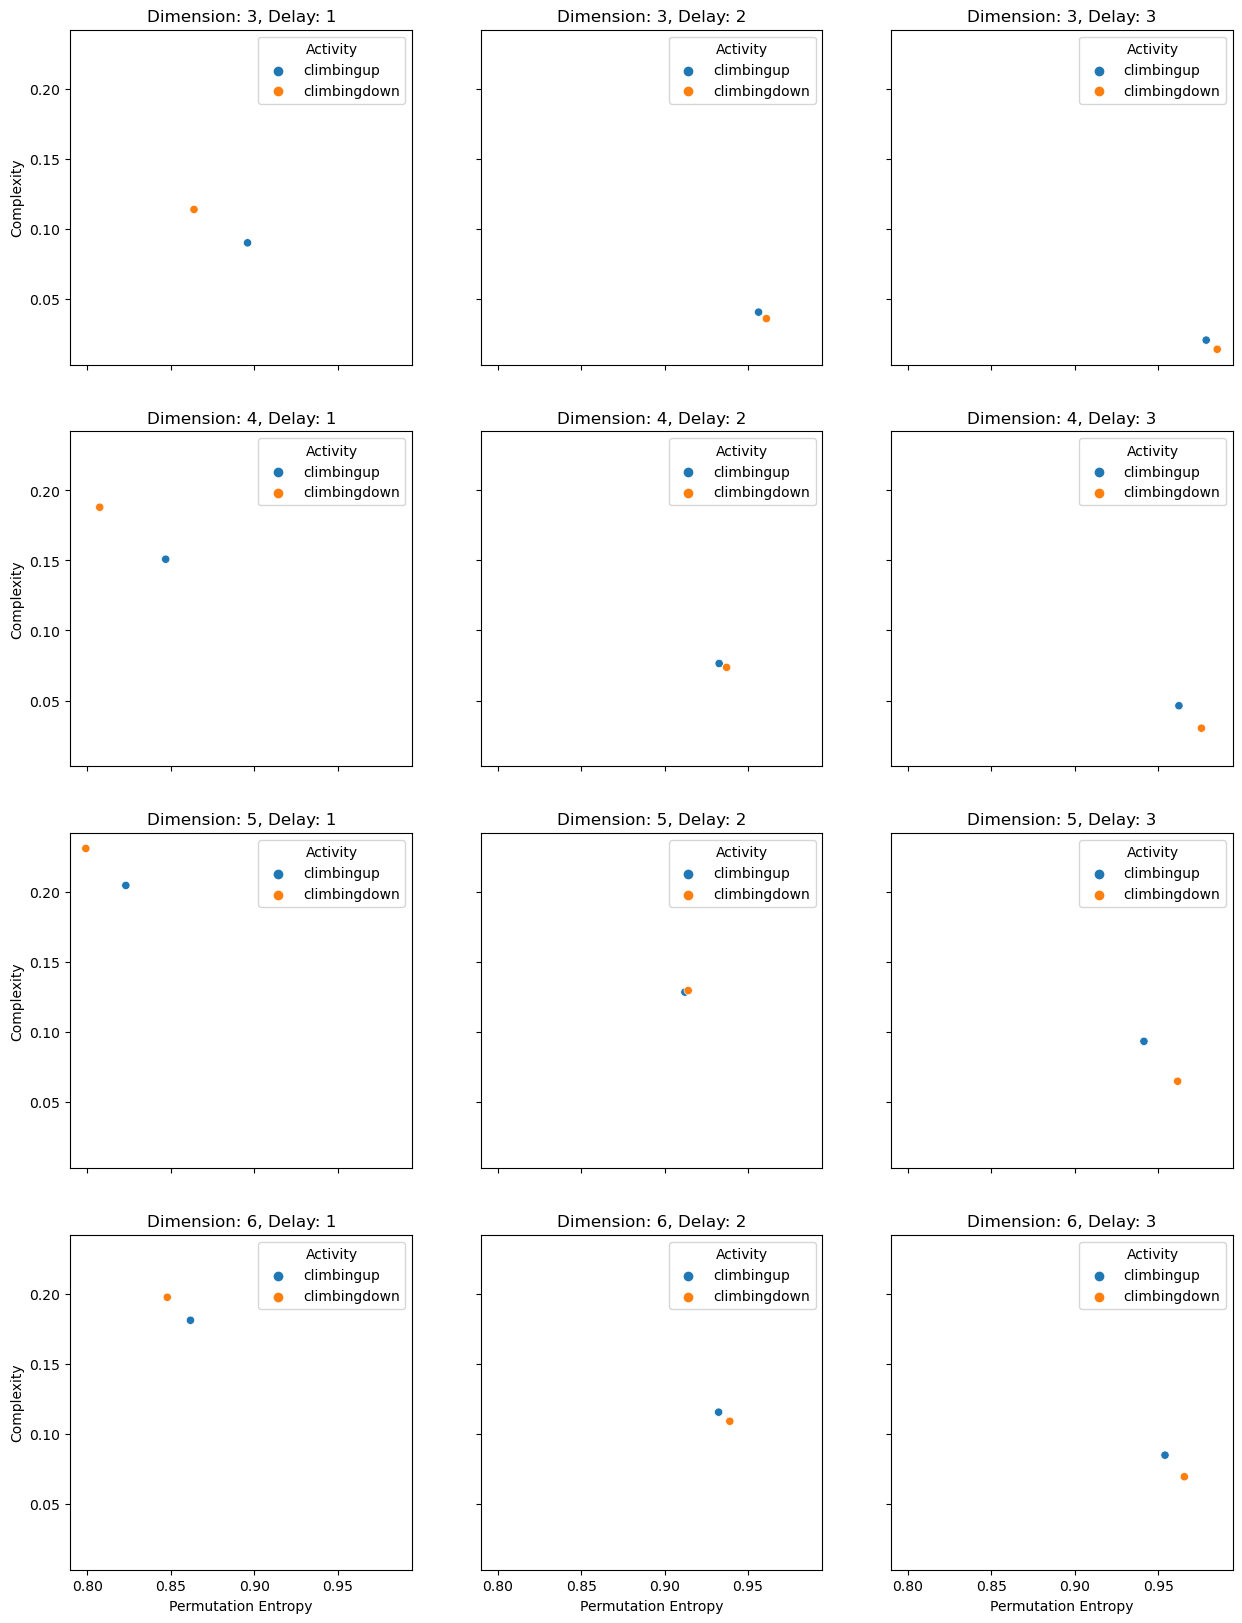

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

dimensions = [3, 4, 5, 6]
delays = [1, 2, 3]

# Calculate the total number of plots
total_plots = len(dimensions) * len(delays)

'''Determine the number of rows/columns for the subplot grid
Here, we're creating a grid that has a number of rows equal to the number of dimensions
and a number of columns equal to the number of delays'''

num_rows = len(dimensions)
num_cols = len(delays)

# Create a figure and axes for the subplots, find the best fig size to fit the subpplots

fig, axs = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows), sharex=True, sharey=True)

#iterate through the dimension and delay values using enumerate function 
for i, dimension in enumerate(dimensions):
    for j, delay in enumerate(delays):
        ax = axs[i, j]
        # Filter data for the specific dimension and delay
        plot_data = filtered_df2[(filtered_df2['Dimension'] == dimension) & (filtered_df2['Delay'] == delay)]
        
        # Generate scatter plot for the specific dimension and delay
        sns.scatterplot(ax=ax, data=plot_data, x='Permutation Entropy', y='Complexity', hue='Activity')
        
        # Set title for each subplot to indicate the dimension and delay
        ax.set_title(f'Dimension: {dimension}, Delay: {delay}')  #use f-string to show the D and tau value 


# Display the plot
plt.show()


### Task 4 Conclusion: With the signal length 1024, the optimum dimension is 4 and optimum delay is 1. This combination yields the most separation when PE and complexity are plotted for climbing up and climbing down. 